<a href="https://colab.research.google.com/github/saif12000/Imbanaced_Machine_Learning_Technique/blob/main/India_heart_disease_imbalanced_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Research Objective**: To compare accuracy of different machine learning algorithms before and after solving imbalanced problem. We will try to use SMOTE for oversampling.

#**Variable Description:**
#*Dependent Variable*:
#SM627E-Do you currently have Any heart disease? (0-No, 1-Yes)
#*Independent Variable*:
#MV012-Current age
#MV190-Wealth index combined (1-Poorest,2-Poorer, 3-Middle,4-Richer,5-Richest)
#MV463A-Smokes cigarettes (0-No, 1-Yes)
#SM619-Do you drink alcohol (0-No,1-Yes)
#MV025-Type of place of residence (1-Urban, 2-Rural)
#SM627B-Do you currently have hypertension (0-No, 1-Yes)
#MV106-Educational level (0-No education, 1-Primary,  2-Secondary,3-Higher)
#SM630D-Frequency of eating fruits (0-Never, 1-Daily, 2-Weekly, 3-Occassionally)
#SM630E-Frequency of eating eggs (0-Never, 1-Daily, 2-Weekly, 3-Occassionally)

#Importing all Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score,KFold

#Importing Libraries

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/india_men_data_after_cleaning_preprocessing_excel_final.csv")

In [ ]:
df.head()

,MV012,MV013,MV463A,SM619,MV025,SM627B,SM627E,MV190,MV106,SM630D,SM630E
0,24,2,0,0,2,0,0,Poorer,Secondary,Fruits_Weekly,Eggs_Occasionally
1,21,2,0,0,2,0,0,Poorer,Primary,Fruits_Occasionally,Eggs_Weekly
2,31,4,0,0,2,0,0,Richest,Secondary,Fruits_Occasionally,Eggs_Weekly
3,42,6,0,0,2,0,0,Middle,Secondary,Fruits_Occasionally,Eggs_Weekly
4,17,1,0,0,2,0,0,Middle,Secondary,Fruits_Weekly,Eggs_Occasionally


#Data Preprocessing

In [ ]:
MV190_dummy = pd.get_dummies(df['MV190'])
MV106_dummy=pd.get_dummies(df['MV106'])
SM630D_dummy=pd.get_dummies(df['SM630D'])
SM630E_dummy=pd.get_dummies(df['SM630E'])
df=pd.concat([df,MV190_dummy,MV106_dummy,SM630D_dummy,SM630E_dummy],axis=1) #axis = 0 represents horizontal axis or rows and axis = 1 represents vertical axis or columns


In [ ]:
df.drop('MV013',axis=1,inplace=True)
df.drop('MV190',axis=1,inplace=True)
df.drop('MV106',axis=1,inplace=True)
df.drop('SM630D',axis=1,inplace=True)
df.drop('SM630E',axis=1,inplace=True)

In [ ]:
df

,MV012,MV463A,SM619,MV025,SM627B,SM627E,Middle,Poorer,Poorest,Richer,...,Primary,Secondary,Fruits_Daily,Fruits_Never,Fruits_Occasionally,Fruits_Weekly,Eggs_Daily,Eggs_Never,Eggs_Occasionally,Eggs_Weekly
0,24,0,0,2,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,21,0,0,2,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,31,0,0,2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,42,0,0,2,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,17,0,0,2,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100812,15,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
100813,42,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
100814,40,1,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
100815,52,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
df.columns

Index(['MV012', 'MV463A', 'SM619', 'MV025', 'SM627B', 'SM627E', 'Middle',
       'Poorer', 'Poorest', 'Richer', 'Richest', 'Higher', 'No education',
       'Primary', 'Secondary', 'Fruits_Daily', 'Fruits_Never',
       'Fruits_Occasionally', 'Fruits_Weekly', 'Eggs_Daily', 'Eggs_Never',
       'Eggs_Occasionally', 'Eggs_Weekly'],
      dtype='object')

#Independent Variable

In [ ]:
X=df[['MV012', 'MV463A', 'SM619', 'MV025', 'SM627B', 'Middle',
       'Poorer', 'Richer', 'Richest', 'Higher',
       'Primary', 'Secondary', 'Fruits_Daily',
       'Fruits_Occasionally', 'Fruits_Weekly', 'Eggs_Daily',
       'Eggs_Occasionally', 'Eggs_Weekly']]

In [ ]:
X

,MV012,MV463A,SM619,MV025,SM627B,Middle,Poorer,Richer,Richest,Higher,Primary,Secondary,Fruits_Daily,Fruits_Occasionally,Fruits_Weekly,Eggs_Daily,Eggs_Occasionally,Eggs_Weekly
0,24,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,21,0,0,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,31,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,42,0,0,2,0,1,0,0,0,0,0,1,0,1,0,0,0,1
4,17,0,0,2,0,1,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100812,15,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
100813,42,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0
100814,40,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
100815,52,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0


In [ ]:
y = df[['SM627E']]
y

,SM627E
0,0
1,0
2,0
3,0
4,0
...,...
100812,0
100813,0
100814,0
100815,0


In [ ]:
print('Negative/No Heart disease', round(df['SM627E'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Positive/Heart Disease', round(df['SM627E'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Negative/No Heart disease 99.23 % of the dataset
Positive/Heart Disease 0.77 % of the dataset


In [ ]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.9e+03 s
PCA took 0.32 s
Truncated SVD took 0.42 s


ValueError: ignored

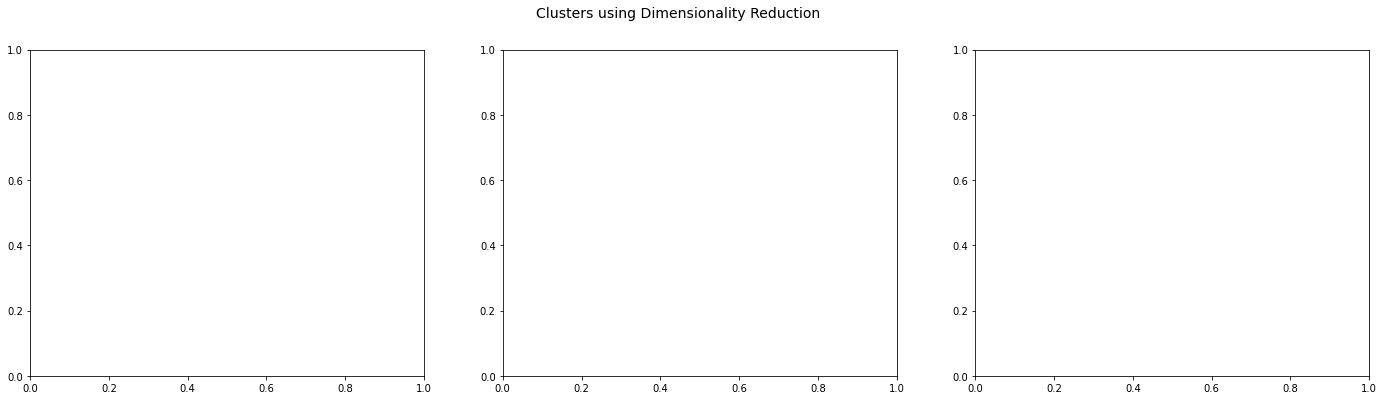

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()


#Accuracy of Machine Learning Algorithms Before implementing SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Logistic Regression is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Logistic Regression is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[40017     0]
 [  310     0]]

The accuracy of Logistic Regression is :  99.23128425124607 %

Precision score for Logistic Regression is : 0.0 %

Recall score for Logistic Regression is : 0.0 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
model.fit(X_train, y_train)
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Random Forest Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Random Forest Regression is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Random Forest Regression is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[29956    44]
 [  245     1]]

The accuracy of Random Forest Regression is :  99.04450175229782 %

Precision score for Random Forest Regression is : 2.2222222222222223 %

Recall score for Random Forest Regression is : 0.40650406504065045 %


#Precision and Recall looks very Poor, which is important as a part of accuracy of our model.

#Let's Use SMOTE for oversampling and apply Machine Learning Algorithm

In [ ]:
from imblearn import under_sampling, over_sampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE


In [ ]:
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [ ]:
X

,MV012,MV463A,SM619,MV025,SM627B,Middle,Poorer,Richer,Richest,Higher,Primary,Secondary,Fruits_Daily,Fruits_Occasionally,Fruits_Weekly,Eggs_Daily,Eggs_Occasionally,Eggs_Weekly
0,24,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,21,0,0,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1
2,31,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,42,0,0,2,0,1,0,0,0,0,0,1,0,1,0,0,0,1
4,17,0,0,2,0,1,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200077,24,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1
200078,42,0,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1
200079,30,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0
200080,41,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
y.value_counts()

SM627E
0         100041
1         100041
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42,stratify=y)

NameError: ignored

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Logistic Regression is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Logistic Regression is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[32431  7325]
 [ 7929 32348]]

The accuracy of Logistic Regression is :  80.9403621006335 %

Precision score for Logistic Regression is : 81.536561389358 %

Recall score for Logistic Regression is : 80.31382674975792 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
model.fit(X_train, y_train)
predicted=model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Random Forest Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Random Forest Regression is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Random Forest Regression is :",recall_score(y_test, predicted,)*100, "%")

Confusion Matrix : 
 [[36223  3533]
 [  593 39684]]

The accuracy of Random Forest Regression is :  94.84462659153098 %

Precision score for Random Forest Regression is : 91.82497628248143 %

Recall score for Random Forest Regression is : 98.52769570722745 %


#Import the SMOTE-NC


In [ ]:
from imblearn.over_sampling import SMOTENC

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/india_men_data_after_cleaning_preprocessing_excel_final.csv")


In [ ]:
MV190_dummy = pd.get_dummies(df['MV190'])
MV106_dummy=pd.get_dummies(df['MV106'])
SM630D_dummy=pd.get_dummies(df['SM630D'])
SM630E_dummy=pd.get_dummies(df['SM630E'])
df=pd.concat([df,MV190_dummy,MV106_dummy,SM630D_dummy,SM630E_dummy],axis=1) #axis = 0 represents horizontal axis or rows and axis = 1 represents vertical axis or columns
df.drop('MV013',axis=1,inplace=True)
df.drop('MV190',axis=1,inplace=True)
df.drop('MV106',axis=1,inplace=True)
df.drop('SM630D',axis=1,inplace=True)
df.drop('SM630E',axis=1,inplace=True)

In [ ]:
X=df[['MV012', 'MV463A', 'SM619', 'MV025', 'SM627B', 'Middle',
       'Poorer', 'Richer', 'Richest', 'Higher',
       'Primary', 'Secondary', 'Fruits_Daily',
       'Fruits_Occasionally', 'Fruits_Weekly', 'Eggs_Daily',
       'Eggs_Occasionally', 'Eggs_Weekly']]

In [ ]:
y = df[['SM627E']]
y

,SM627E
0,0
1,0
2,0
3,0
4,0
...,...
100812,0
100813,0
100814,0
100815,0


In [ ]:
#!pip install pycaret

In [ ]:
pip install pycaret[full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 5.2 MB/s 
     |████████████████████████████████| 6.1 MB 39.9 MB/s 
     |████████████████████████████████| 569 kB 33.3 MB/s 
     |████████████████████████████████| 11.9 MB 39.9 MB/s 
     |████████████████████████████████| 40 kB 4.4 MB/s 
     |████████████████████████████████| 132 kB 39.4 MB/s 
     |████████████████████████████████| 377 kB 38.6 MB/s 
     |████████████████████████████████| 92 kB 104 kB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 100 kB 4.1 MB/s 
     |████████████████████████████████| 57 kB 3.7 MB/s 
     |████████████████████████████████| 255.9 MB 39 kB/s 
     |████████████████████████████████| 59.4 MB 1.3 MB/s 
     |████████████████████████████████| 305 kB 75.1 MB/s 
     |████████████████████████████████| 76.6 MB 1.4 MB/s 
     |████████████████████████████████| 

In [ ]:
from pycaret.classification import *

In [ ]:
clf1 = setup(df, target = 'SM627E')

,Description,Value
0,session_id,3799
1,Target,SM627E
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(100817, 23)"
5,Missing Values,False
6,Numeric Features,18
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='SM627E',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9924,0.7467,0.0000,0.0000,0.0000,0.0000,0.0000,2.846
knn,K Neighbors Classifier,0.9924,0.5118,0.0000,0.0000,0.0000,0.0000,0.0000,3.748
ridge,Ridge Classifier,0.9924,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.086
ada,Ada Boost Classifier,0.9924,0.7416,0.0000,0.0000,0.0000,0.0000,0.0000,1.820
gbc,Gradient Boosting Classifier,0.9924,0.7398,0.0000,0.0000,0.0000,-0.0001,-0.0003,4.811
dummy,Dummy Classifier,0.9924,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.462
lightgbm,Light Gradient Boosting Machine,0.9923,0.7120,0.0000,0.0000,0.0000,-0.0002,-0.0007,0.676
xgboost,Extreme Gradient Boosting,0.9922,0.6683,0.0000,0.0000,0.0000,-0.0004,-0.0010,6.950
svm,SVM - Linear Kernel,0.9916,0.0000,0.0132,0.0097,0.0112,0.0104,0.0105,0.628
rf,Random Forest Classifier,0.9912,0.6073,0.0038,0.0211,0.0064,0.0042,0.0059,4.464


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3799, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3799, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf1 = setup(df1, target = 'SM627E')


,Description,Value
0,session_id,417
1,Target,SM627E
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(100817, 19)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='SM627E',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
smotenc = SMOTENC([1],random_state = 101)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

In [ ]:
X_oversample

,MV012,MV463A,SM619,MV025,SM627B,Middle,Poorer,Richer,Richest,Higher,Primary,Secondary,Fruits_Daily,Fruits_Occasionally,Fruits_Weekly,Eggs_Daily,Eggs_Occasionally,Eggs_Weekly
0,38,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
1,24,0,0,2,0,0,0,0,1,0,0,1,0,0,1,0,0,1
2,25,0,1,2,0,1,0,0,0,0,0,1,1,0,0,0,1,0
3,28,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,24,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140077,54,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
140078,40,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0
140079,40,0,0,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0
140080,45,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1


In [ ]:
df2=pd.concat([X_oversample, y_oversample],axis=1) 

In [ ]:
df2

,MV012,MV463A,SM619,MV025,SM627B,Middle,Poorer,Richer,Richest,Higher,Primary,Secondary,Fruits_Daily,Fruits_Occasionally,Fruits_Weekly,Eggs_Daily,Eggs_Occasionally,Eggs_Weekly,SM627E
0,38,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
1,24,0,0,2,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,25,0,1,2,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
3,28,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,24,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140077,54,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
140078,40,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
140079,40,0,0,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
140080,45,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1


In [ ]:
clf1 = setup(df2, target = 'SM627E')

,Description,Value
0,session_id,7118
1,Target,SM627E
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(140082, 19)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='SM627E',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9596,0.9875,0.9895,0.9338,0.9608,0.9193,0.9209,6.007
et,Extra Trees Classifier,0.9590,0.9864,0.9891,0.9329,0.9602,0.9180,0.9197,6.776
dt,Decision Tree Classifier,0.9570,0.9790,0.9895,0.9292,0.9584,0.9141,0.9160,0.246
catboost,CatBoost Classifier,0.9399,0.9799,0.9765,0.9099,0.9421,0.8799,0.8823,25.744
knn,K Neighbors Classifier,0.9354,0.9699,0.9793,0.9003,0.9382,0.8709,0.8743,5.460
xgboost,Extreme Gradient Boosting,0.9341,0.9769,0.9700,0.9050,0.9364,0.8682,0.8704,8.975
lightgbm,Light Gradient Boosting Machine,0.9050,0.9598,0.9447,0.8752,0.9086,0.8100,0.8126,1.045
gbc,Gradient Boosting Classifier,0.8553,0.9235,0.8832,0.8365,0.8592,0.7105,0.7116,6.259
lr,Logistic Regression,0.8309,0.9060,0.8259,0.8342,0.8300,0.6618,0.6618,2.931
lda,Linear Discriminant Analysis,0.8302,0.9036,0.8170,0.8391,0.8279,0.6604,0.6606,0.530


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7118, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7118, verbose=0,
                       warm_start=False)

In [ ]:
#Classifier with imbalance data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30000
           1       0.00      0.00      0.00       246

    accuracy                           0.99     30246
   macro avg       0.50      0.50      0.50     30246
weighted avg       0.98      0.99      0.99     30246



#Checking Significance Using Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [ ]:
df=pd.concat([X,y],axis=1)

In [ ]:
df

,MV012,MV463A,SM619,MV025,SM627B,Middle,Poorer,Richer,Richest,Higher,Primary,Secondary,Fruits_Daily,Fruits_Occasionally,Fruits_Weekly,Eggs_Daily,Eggs_Occasionally,Eggs_Weekly,SM627E
0,24,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
1,21,0,0,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,31,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,42,0,0,2,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
4,17,0,0,2,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100812,15,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
100813,42,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
100814,40,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
100815,52,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0


In [ ]:
df=pd.concat([X,y],axis=1)

In [ ]:
df

,MV012,MV463A,SM619,MV025,SM627B,Middle,Poorer,Richer,Richest,Higher,Primary,Secondary,Fruits_Daily,Fruits_Occasionally,Fruits_Weekly,Eggs_Daily,Eggs_Occasionally,Eggs_Weekly,SM627E
0,24,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
1,21,0,0,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,31,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,42,0,0,2,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
4,17,0,0,2,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100812,15,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
100813,42,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
100814,40,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
100815,52,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0


In [ ]:
model = sm.GLM.from_formula("SM627E~MV463A+SM619+MV025+SM627B+Poorest+Richer+Richest+Primary+Secondary+Fruits_Never+Fruits_Occasionally+Fruits_Weekly+Eggs_Never+Eggs_Occasionally+Eggs_Weekly", family=sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

PatsyError: ignored

#DATA PREPROCESSING IS REQUIRED

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

X_res, y_res = sm.fit_resample(X, y)




X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 0, test_size = 0.2)

"""Now we normalize X_train and X_test separately to avoid information leakage"""

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred_dt = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred_rf = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

import sklearn
sklearn.__version__

classifier.get_params(deep=True)

In [ ]:
y_res.value_counts

#Probablity Threshold

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/india_men_data_after_cleaning_preprocessing_excel_final.csv")

In [ ]:
MV190_dummy = pd.get_dummies(df['MV190'])
MV106_dummy=pd.get_dummies(df['MV106'])
SM630D_dummy=pd.get_dummies(df['SM630D'])
SM630E_dummy=pd.get_dummies(df['SM630E'])
df=pd.concat([df,MV190_dummy,MV106_dummy,SM630D_dummy,SM630E_dummy],axis=1) #axis = 0 represents horizontal axis or rows and axis = 1 represents vertical axis or columns


In [ ]:
df.drop('MV013',axis=1,inplace=True)
df.drop('MV190',axis=1,inplace=True)
df.drop('MV106',axis=1,inplace=True)
df.drop('SM630D',axis=1,inplace=True)
df.drop('SM630E',axis=1,inplace=True)

In [ ]:
X=df[['MV012', 'MV463A', 'SM619', 'MV025', 'SM627B', 'Middle',
       'Poorer', 'Richer', 'Richest', 'Higher',
       'Primary', 'Secondary', 'Fruits_Daily',
       'Fruits_Occasionally', 'Fruits_Weekly', 'Eggs_Daily',
       'Eggs_Occasionally', 'Eggs_Weekly']]

In [ ]:
y = df[['SM627E']]
y

,SM627E
0,0
1,0
2,0
3,0
4,0
...,...
100812,0
100813,0
100814,0
100815,0


In [ ]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

In [ ]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]